In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [17]:
df=pd.read_csv('data.csv')

In [18]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [19]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Descriptive statistics

In [21]:
print("descriptive statistics for numerical variables :")
df_num=df[['Age','Annual_Premium','Vintage']].describe().round(2)
df_num

descriptive statistics for numerical variables :


,Age,Annual_Premium,Vintage
count,381109.00,381109.00,381109.00
mean,38.82,30564.39,154.35
std,15.51,17213.16,83.67
min,20.00,2630.00,10.00
25%,25.00,24405.00,82.00
50%,36.00,31669.00,154.00
75%,49.00,39400.00,227.00
max,85.00,540165.00,299.00


Frequency counts for categorical variables:

In [22]:
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [23]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [24]:
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

# Hypothesis testing

### 1. T-tests for Numerical variables (Age,Annual_Premium,Vintage) vs Response

In [25]:
def t_test_numerical(feature,target='Response'):
    group0=df[df[target]==0][feature]
    group1=df[df[target]==1][feature]
    t_stat,p_val = stats.ttest_ind(group0,group1,nan_policy='omit')
    print(f"\nT-test for {feature} vs Response:")
    print(f"T-statistic : {t_stat:.4f}, p-value : {p_val :.4f}")
    if p_val < 0.05:
        print(f"Significant difference in {feature} between Response groups.")
    else:
        print(f"No significant difference in {feature} between Response groups.")

for feature in ['Age','Annual_Premium','Vintage']:
    t_test_numerical(feature)
    


T-test for Age vs Response:
T-statistic : -69.0431, p-value : 0.0000
Significant difference in Age between Response groups.

T-test for Annual_Premium vs Response:
T-statistic : -13.9398, p-value : 0.0000
Significant difference in Annual_Premium between Response groups.

T-test for Vintage vs Response:
T-statistic : 0.6484, p-value : 0.5167
No significant difference in Vintage between Response groups.


### 2. Chi-square tests for categorical variables vs Response

In [26]:
def chi_square_test(feature,target='Response'):
    contingency_table=pd.crosstab(df[feature],df[target])
    chi2,p_val,dof,expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square test for {feature} vs Response:")
    print(f"Chi2 Statistic : {chi2:.4f},p-value:{p_val:.4f}")
    if p_val < 0.05:
        print(f"Significant association between {feature} and Response.")
    else:
        print(f"No significant association between {feature} and Response.")

for feature in ['Gender','Vehicle_Age','Vehicle_Damage','Previously_Insured']:
    chi_square_test(feature)


Chi-square test for Gender vs Response:
Chi2 Statistic : 1047.7078,p-value:0.0000
Significant association between Gender and Response.

Chi-square test for Vehicle_Age vs Response:
Chi2 Statistic : 18771.8899,p-value:0.0000
Significant association between Vehicle_Age and Response.

Chi-square test for Vehicle_Damage vs Response:
Chi2 Statistic : 47864.7618,p-value:0.0000
Significant association between Vehicle_Damage and Response.

Chi-square test for Previously_Insured vs Response:
Chi2 Statistic : 44357.9647,p-value:0.0000
Significant association between Previously_Insured and Response.


# A/B Testing

### A/B test: Comparing Response rates between two Policy_Sales channels

In [27]:
# Let's assume Policy_Sales channel 26 vs channel 152 (common in the sample)
group_a = df[df['Policy_Sales_Channel'] == 26]['Response']
group_b = df[df['Policy_Sales_Channel'] == 152]['Response']

# Calculate success rates
success_a = group_a.sum()
success_b = group_b.sum()
n_a = len(group_a)
n_b = len(group_b)

In [28]:
# Perform proportions z-test
count = np.array([success_a, success_b])
nobs = np.array([n_a, n_b])
z_stat, p_val = proportions_ztest(count, nobs)
print("\nA/B Test (Policy_Sales 26 vs 152):")
print(f"Success Rate (Channel 26): {success_a/n_a:.4f}")
print(f"Success Rate (Channel 152): {success_b/n_b:.4f}")
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Significant difference in Response rates between the two channels.")
else:
    print("No significant difference in Response rates between the two channels.")


A/B Test (Policy_Sales 26 vs 152):
Success Rate (Channel 26): 0.1994
Success Rate (Channel 152): 0.0286
Z-statistic: 132.1726, P-value: 0.0000
Significant difference in Response rates between the two channels.


#### Histogram - Age Distribution

<Figure size 600x400 with 0 Axes>

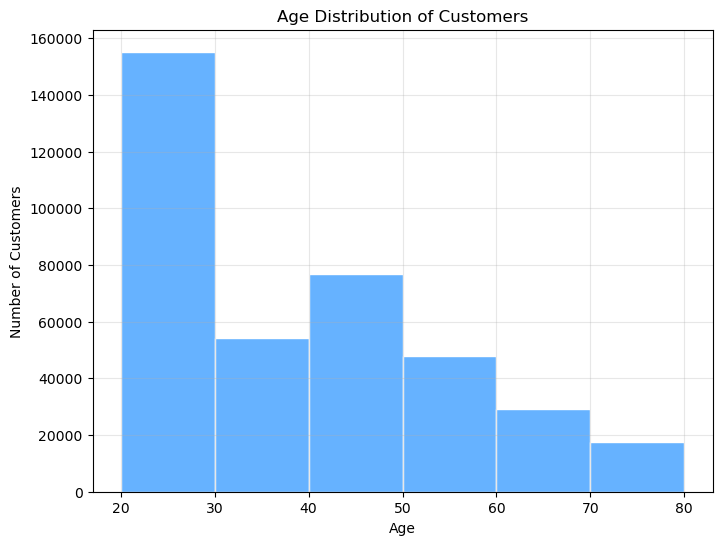

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=range(20, 90, 10), color='#66B2FF', edgecolor='white')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
gender_counts = df['Gender'].value_counts()
vehicle_age_counts = df['Vehicle_Age'].value_counts()
vehicle_damage_counts = df['Vehicle_Damage'].value_counts()
response_counts = df['Response'].value_counts()

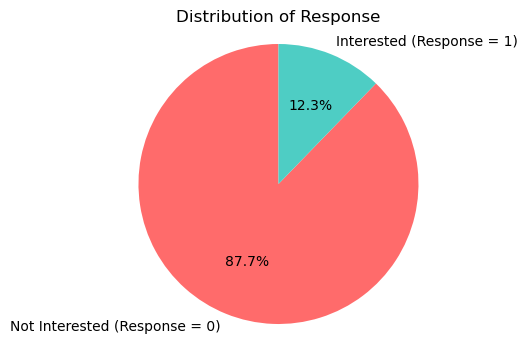

In [31]:
# Pie Chart - Response Distribution
plt.figure(figsize=(6, 4))
plt.pie(response_counts.values, labels=['Not Interested (Response = 0)', 'Interested (Response = 1)'], 
        colors=['#FF6B6B', '#4ECDC4'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Response')
plt.axis('equal')
plt.show()

"This pie chart highlights a key challenge in our dataset: the target variable 'Response' is highly imbalanced.
 Only 12.3% of customers are interested in insurance, while 87.7% are not. 
 This imbalance means a model might just predict 'not interested' for everyone and still be accurate most of the time.

#### Bar Chart - A/B Test Results (Policy Sales Channels 26 vs 152)

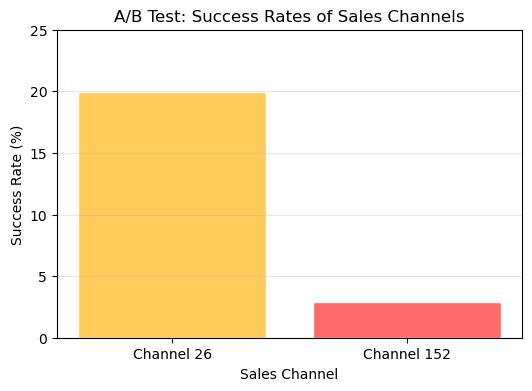

In [32]:
channels = ['Channel 26', 'Channel 152']
success_rates = [19.94, 2.86]  # From A/B test results
colors = ['#FFCC5C', '#FF6B6B']

plt.figure(figsize=(6, 4))
plt.bar(channels, success_rates, color=colors, edgecolor='white')
plt.title('A/B Test: Success Rates of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 25)  # Set y-axis limit for better visualization
plt.grid(True, axis='y', alpha=0.3)
plt.show()

"This bar chart shows the results of our A/B test comparing two sales channels. Channel 26 has a success rate of 19.94%, meaning nearly 20% of customers contacted through this channel were interested in insurance. In contrast, Channel 152 has a success rate of only 2.86%. The test confirmed this difference is significant, with a p-value of 0.0000. This tells the company they should focus marketing efforts on Channel 26 to get better results, and it also confirms that the sales channel is an important feature for our prediction model."

#### Bar Chart - Gender Distribution

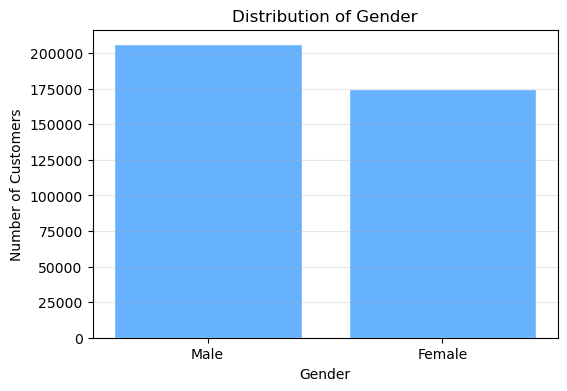

In [33]:
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color='#66B2FF', edgecolor='white')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

"This bar chart shows the gender distribution of our customers. About 57% are male, and 43% are female, so the split is fairly balanced. Our earlier chi-square test showed that gender doesn’t significantly affect interest in insurance, so it might not be a strong predictor in our model, but it’s still good to understand our customer base."

#### Bar Chart - Vehicle_Age Distribution

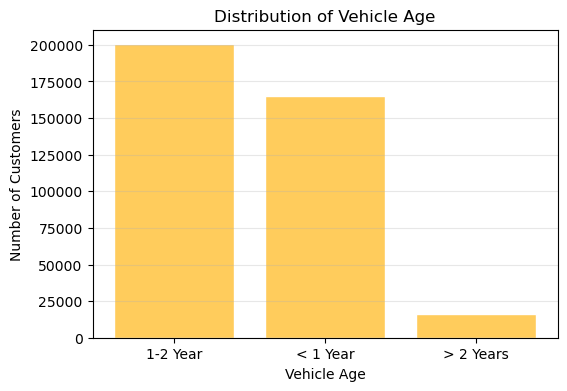

In [34]:
plt.figure(figsize=(6, 4))
plt.bar(vehicle_age_counts.index, vehicle_age_counts.values, color='#FFCC5C', edgecolor='white')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

"Here’s the distribution of vehicle age. Most vehicles—about 60%—are between 1 and 2 years old, while 24% are less than a year old, and 16% are over 2 years old. Our chi-square test showed that vehicle age is significantly related to interest in insurance, with older vehicles more likely to be associated with interest. This makes vehicle age an important feature for our prediction model."

#### Bar Chart - Vehicle_Damage Distribution

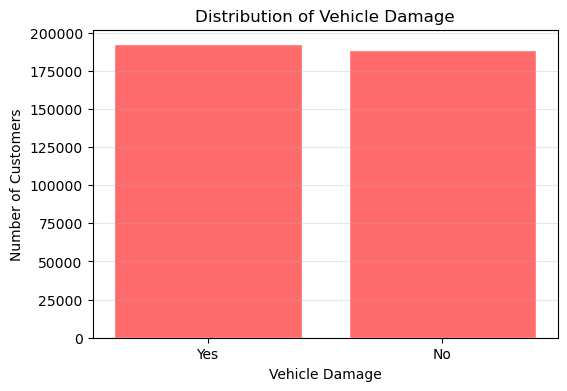

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(vehicle_damage_counts.index, vehicle_damage_counts.values, color='#FF6B6B', edgecolor='white')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

"This chart shows the distribution of vehicle damage. It’s almost evenly split—55% of customers have had vehicle damage, and 45% have not. Our chi-square test found that vehicle damage is a strong predictor of interest in insurance, with those who’ve had damage being much more likely to be interested. This is one of the key features I included in my machine learning models."

#### Histogram - Distribution of Annual_Premium

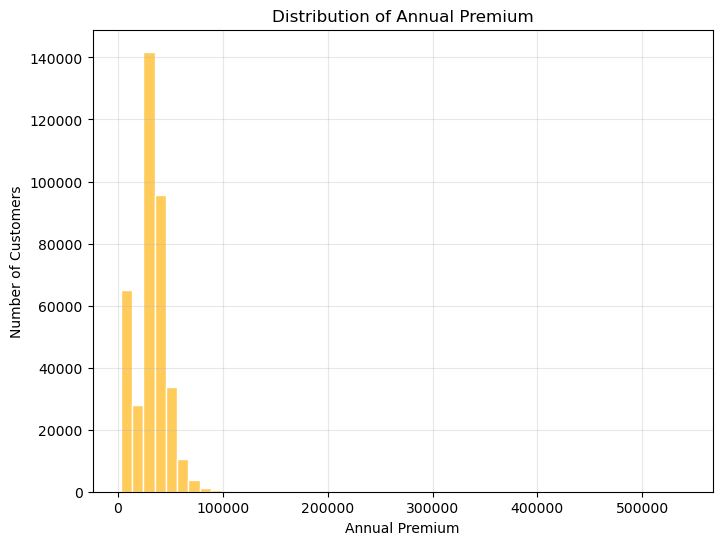

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(df['Annual_Premium'], bins=50, color='#FFCC5C', edgecolor='white')
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)
plt.show()

"This histogram shows the distribution of annual premiums. The average premium is around 30,564, but the range is huge—from 2,630 to over 540,000. You can see it’s right-skewed, meaning most customers pay lower premiums, but there are some extreme outliers with very high premiums. Our t-test showed that annual premium differs between interested and uninterested customers, which we’ll explore in the next chart."

#### Box Plot - Annual_Premium by Response

<Figure size 800x600 with 0 Axes>

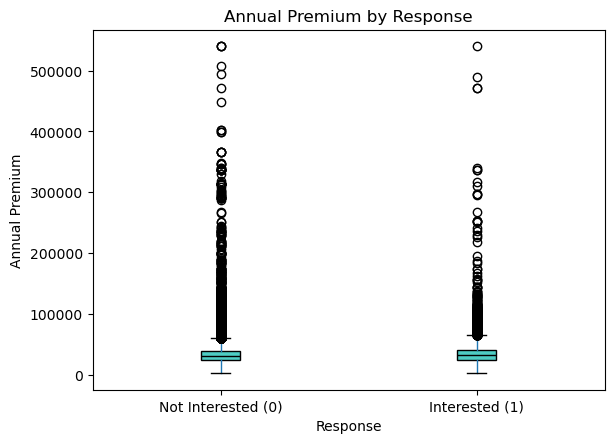

In [37]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Annual_Premium', by='Response', grid=False, patch_artist=True,
           boxprops=dict(facecolor='#4ECDC4', color='black'),
           medianprops=dict(color='black'))
plt.title('Annual Premium by Response')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.xticks([1, 2], ['Not Interested (0)', 'Interested (1)'])
plt.show()

"This box plot compares annual premiums between customers who are interested in insurance and those who aren’t. The median premium for interested customers is lower—around 28,000—compared to about 32,000 for those not interested. This aligns with our t-test, which showed a significant difference. It suggests that higher premiums might discourage interest, so I included this feature in my model and considered transforming it to handle the skewness."

#### Stacked Bar Chart - Previously_Insured vs Response

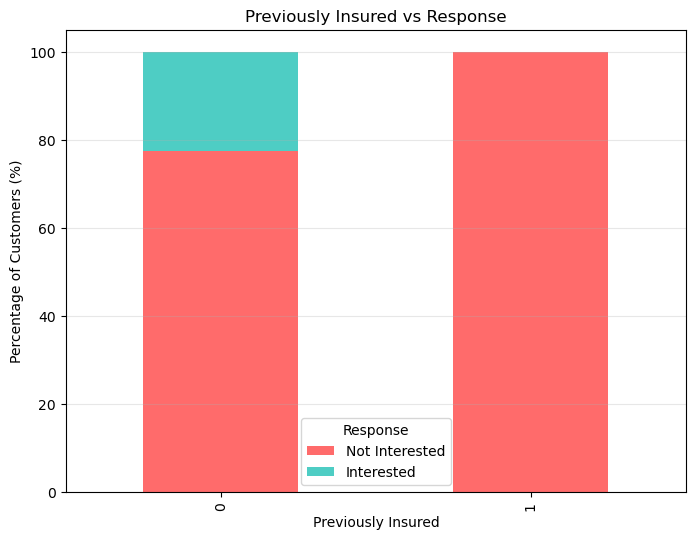

In [38]:
prev_insured_response = pd.crosstab(df['Previously_Insured'], df['Response'], normalize='index') * 100
prev_insured_response.columns = ['Not Interested', 'Interested']
prev_insured_response.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], figsize=(8, 6))
plt.title('Previously Insured vs Response')
plt.xlabel('Previously Insured')
plt.ylabel('Percentage of Customers (%)')
plt.legend(title='Response')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

"This stacked bar chart shows how prior insurance affects interest in buying new insurance. Among customers who weren’t previously insured, about 40% are interested, compared to only 5% of those who already had insurance. This aligns with our chi-square test, which showed a significant relationship. It makes sense—people without prior insurance might feel a greater need for coverage. This is another key feature I included in my machine learning models."